<a href="https://colab.research.google.com/github/dareabioye/dareabioye/blob/main/Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION 1: INITIAL SETUP AND PRE - EDA

In [1]:
# Install Dash for Colab
!pip install jupyter-dash
!pip install dash

Dataset shape: (1001, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1001 non-null   datetime64[ns]
 1   Country(UK)    1001 non-null   object        
 2   Confectionary  1001 non-null   object        
 3   Units Sold     996 non-null    float64       
 4   Cost(£)        992 non-null    float64       
 5   Profit(£)      998 non-null    float64       
 6   Revenue(£)     1001 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 54.9+ KB


None

,Date,Country(UK),Confectionary,Units Sold,Cost(£),Profit(£),Revenue(£)
0,2002-11-11,England,Biscuit,1118.0,2459.6,3130.4,749954.4
1,2002-07-05,England,Biscuit,708.0,1557.6,1982.4,300758.4
2,2001-10-31,England,Biscuit,1269.0,2791.8,3553.2,966216.6
3,2004-09-13,England,Biscuit,1631.0,3588.2,4566.8,1596096.6
4,2004-03-10,England,Biscuit,2240.0,4928.0,6272.0,3010560.0



Missing values per column:


,0
Date,0
Country(UK),0
Confectionary,0
Units Sold,5
Cost(£),9
Profit(£),3
Revenue(£),0



Duplicate rows: 0

Unique values per column:


,0
Date,802
Country(UK),5
Confectionary,8
Units Sold,391
Cost(£),513
Profit(£),511
Revenue(£),499



Confectionary unique values (raw):


array(['Biscuit', 'Biscuit Nut', 'Choclate Chunk', 'Caramel nut',
       'Caramel', 'Plain', 'Chocolate Chunk', 'Caramel Nut'], dtype=object)


Zero Revenue: 5
Negative Revenue: 3

Negative Profit: 0
Negative Units Sold: 0


,Date,Units Sold,Cost(£),Profit(£),Revenue(£)
count,1001,996.000000,992.000000,998.000000,1.001000e+03
mean,2002-11-19 10:54:32.727272832,1633.360442,2820.190877,4012.076052,2.519449e+06
min,2000-01-02 00:00:00,200.000000,40.000000,160.000000,-2.196226e+07
25%,2001-05-12 00:00:00,923.000000,1204.000000,1872.400000,5.762400e+05
50%,2002-11-10 00:00:00,1530.500000,2456.800000,3459.000000,1.627208e+06
75%,2004-04-25 00:00:00,2300.000000,3977.625000,5445.000000,3.551112e+06
max,2005-12-28 00:00:00,4493.000000,10994.500000,13479.000000,2.018705e+07
std,NaN,876.356045,2073.969135,2648.166312,2.941639e+06


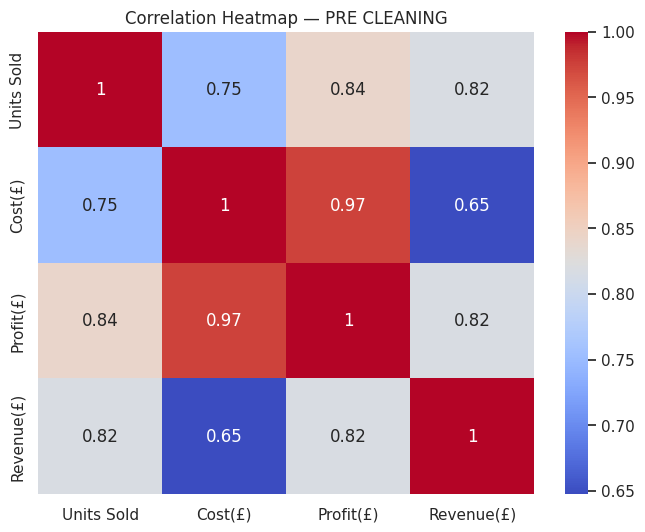

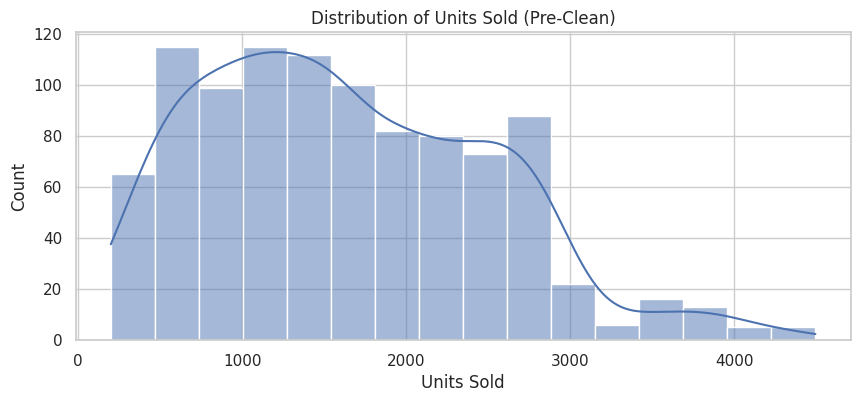

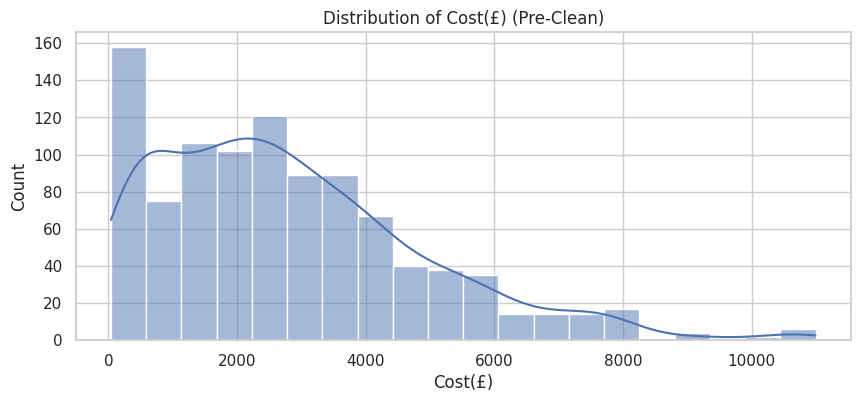

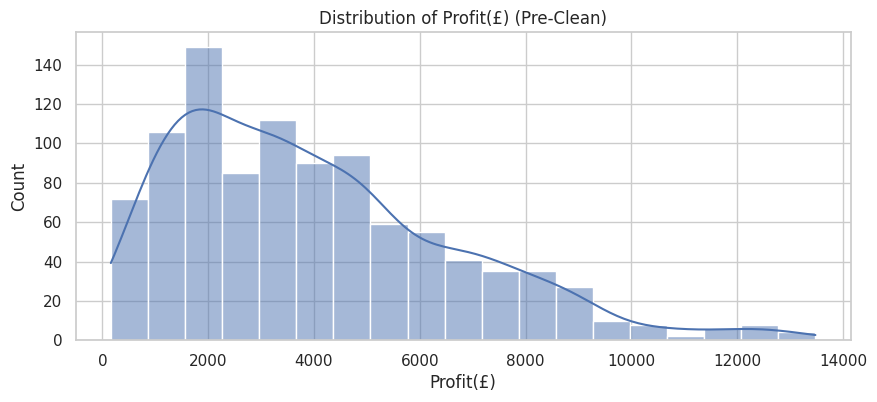

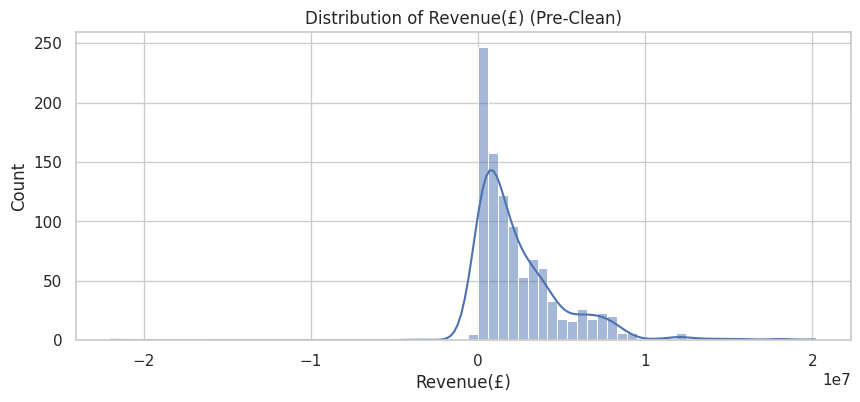

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

from jupyter_dash import JupyterDash
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

sns.set_theme(style="whitegrid")

OUT_DIR = "outputs"
os.makedirs(OUT_DIR, exist_ok=True)

# Load Data
df_raw = pd.read_excel("/content/Confectionary [4564].xlsx")

# ---- 1. BASIC STRUCTURE ----
print("Dataset shape:", df_raw.shape)
print("\nInfo:")
display(df_raw.info())
display(df_raw.head())

# ---- 2. MISSING VALUES ----
print("\nMissing values per column:")
display(df_raw.isna().sum())

# ---- 3. DUPLICATES ----
print("\nDuplicate rows:", df_raw.duplicated().sum())

# ---- 4. UNIQUE VALUES ----
print("\nUnique values per column:")
display(df_raw.nunique())

# ---- 5. DETECT CATEGORY PROBLEMS ----
print("\nConfectionary unique values (raw):")
display(df_raw["Confectionary"].unique())

# ---- 6. ENSURE NUMERIC ----
num_cols = ["Units Sold","Cost(£)","Profit(£)","Revenue(£)"]
for c in num_cols:
    df_raw[c] = pd.to_numeric(df_raw[c], errors="coerce")

# ---- 7. NEGATIVE AND ZERO CHECKS ----
print("\nZero Revenue:", (df_raw["Revenue(£)"] == 0).sum())
print("Negative Revenue:", (df_raw["Revenue(£)"] < 0).sum())

print("\nNegative Profit:", (df_raw["Profit(£)"] < 0).sum())
print("Negative Units Sold:", (df_raw["Units Sold"] < 0).sum())

# ---- 8. SUMMARY STATISTICS ----
display(df_raw.describe())

# ---- 9. PRE-CLEAN HEATMAP ----
plt.figure(figsize=(8,6))
sns.heatmap(df_raw[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap — PRE CLEANING")
plt.show()

# ---- 10. PRE-CLEAN DISTRIBUTIONS ----
for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df_raw[col], kde=True)
    plt.title(f"Distribution of {col} (Pre-Clean)")
    plt.show()


# SECTION 2: POST EDA

In [3]:
# Post Clean
df = df_raw.copy()

# Standardise confectionary names
df["Confectionary"] = df["Confectionary"].astype(str).str.lower().str.strip()
df["Confectionary"] = df["Confectionary"].replace({
    "choclate chunk": "chocolate chunk",
    "caramel nut": "caramel nut"
})

# Remove invalid revenue
df = df[df["Revenue(£)"].notna()]
df = df[df["Revenue(£)"] > 0]

# Calculate Profit Margin
print("\n[2] CALCULATING PROFIT MARGIN...")
df["Profit Margin (%)"] = (df["Profit(£)"] / df["Revenue(£)"]) * 100
df["Profit Margin (%)"] = df["Profit Margin (%)"].round(2)

# Convert Date column
print("\n[3] CONVERTING DATE COLUMN...")
df["Date"] = pd.to_datetime(df["Date"])
print("   Date column converted to datetime")
print(f"    - Date range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"    - Duration: {(df['Date'].max() - df['Date'].min()).days} days")

# Create additional date features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["YearMonth"] = df["Date"].dt.to_period("M")

# Summary after preprocessing
print("\n[4] POST-PREPROCESSING SUMMARY:")
print(f"   Total records: {len(df)}")
print(f"   Total columns: {len(df.columns)}")
print(f"   Unique confectionary types: {df['Confectionary'].nunique()}")
print(f"   Unique regions: {df['Country(UK)'].nunique()}")
print(f"   Date range: {df['Date'].min().year} - {df['Date'].max().year}")

# Save preprocessed data
print("\n[5] SAVING PREPROCESSED DATA...")
df.to_csv(os.path.join(OUT_DIR, "cleaned_dataset.csv"), index=False)
print("Saved cleaned CSV to outputs/cleaned_dataset.csv")

# Remove incomplete numeric rows
df = df.dropna(subset=["Units Sold","Cost(£)","Profit(£)"])

print("Post-clean missing values:")
display(df.isna().sum())
print("New shape:", df.shape)

# Check the clean confectionary count
print("Unique Confectionary values:", df['Confectionary'].value_counts(), df["Confectionary"].unique(), f"Total unique: {df['Confectionary'].nunique()}")




[2] CALCULATING PROFIT MARGIN...

[3] CONVERTING DATE COLUMN...
   Date column converted to datetime
    - Date range: 2000-01-02 to 2005-12-28
    - Duration: 2187 days

[4] POST-PREPROCESSING SUMMARY:
   Total records: 993
   Total columns: 11
   Unique confectionary types: 6
   Unique regions: 5
   Date range: 2000 - 2005

[5] SAVING PREPROCESSED DATA...
Saved cleaned CSV to outputs/cleaned_dataset.csv
Post-clean missing values:


,0
Date,0
Country(UK),0
Confectionary,0
Units Sold,0
Cost(£),0
Profit(£),0
Revenue(£),0
Profit Margin (%),0
Year,0
Month,0


New shape: (984, 11)
Unique Confectionary values: Confectionary
caramel            343
caramel nut        146
chocolate chunk    143
biscuit            122
biscuit nut        121
plain              109
Name: count, dtype: int64 ['biscuit' 'biscuit nut' 'chocolate chunk' 'caramel nut' 'caramel' 'plain'] Total unique: 6


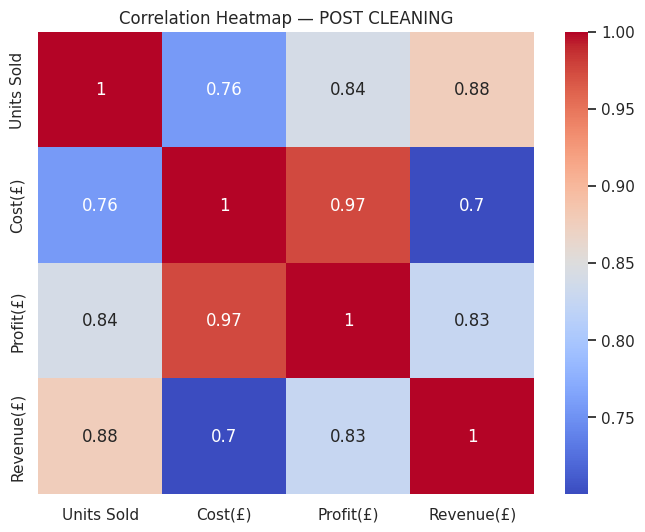

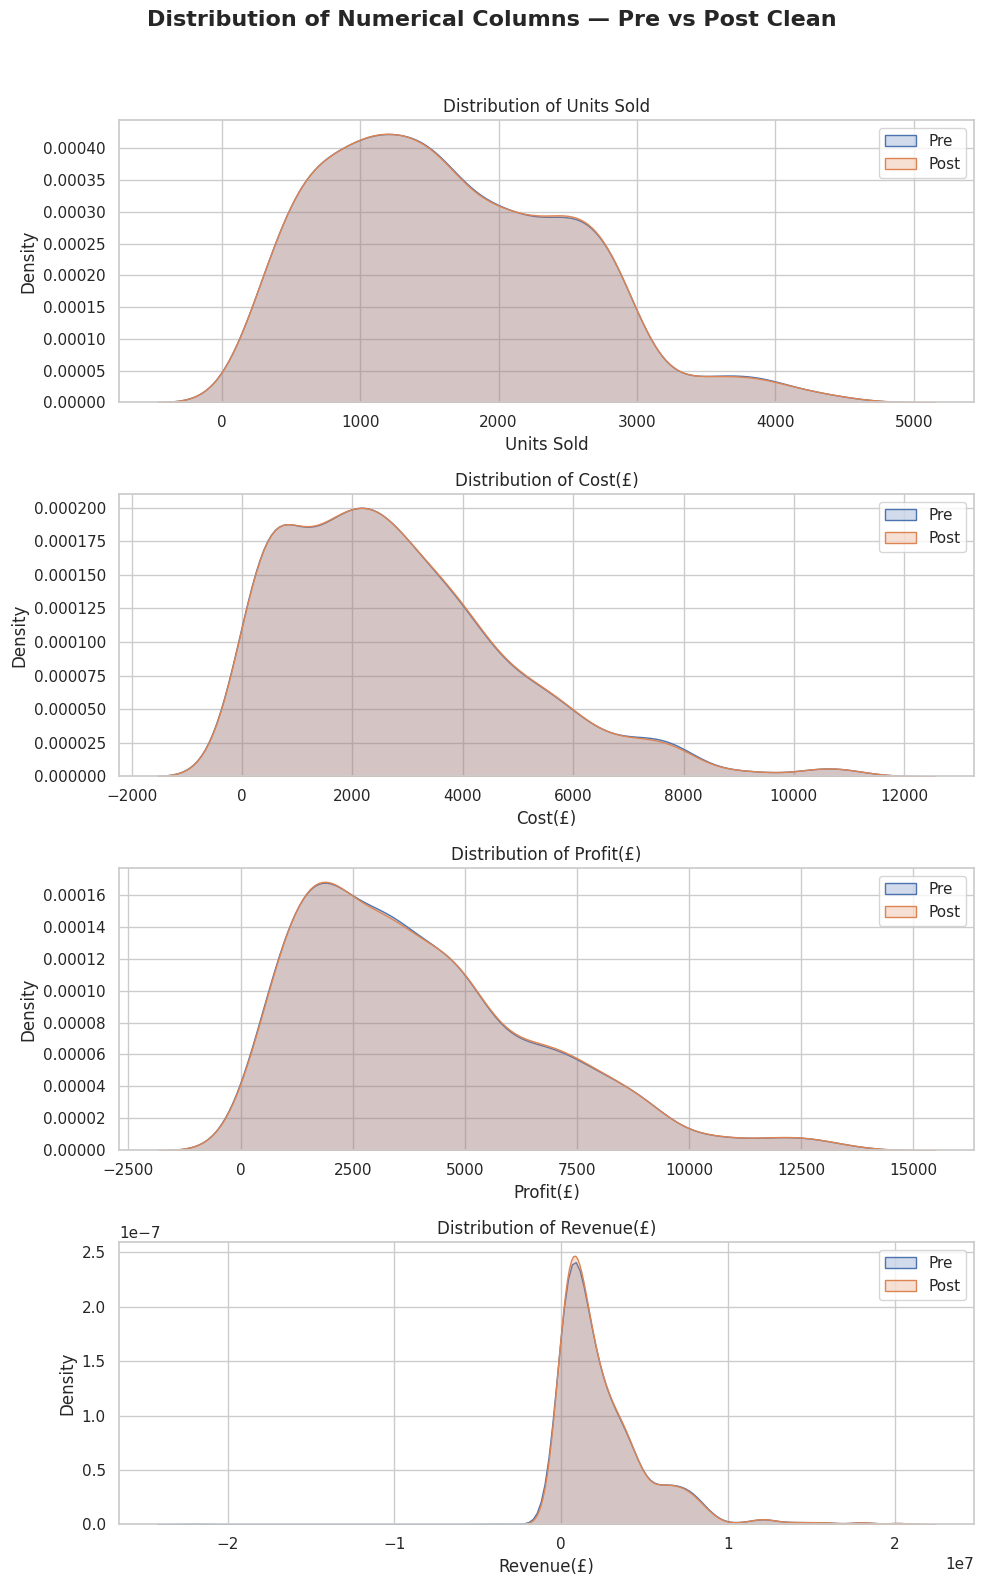

In [4]:
# post clean validation
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap — POST CLEANING")
plt.show()

# Create a single figure with subplots for all KDEs
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, 4 * len(num_cols)))
fig.suptitle("Distribution of Numerical Columns — Pre vs Post Clean", fontsize=16, fontweight='bold', y=1.02)

for i, col in enumerate(num_cols):
    sns.kdeplot(df_raw[col], label="Pre", fill=True, ax=axes[i])
    sns.kdeplot(df[col], label="Post", fill=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].legend()
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

plt.tight_layout(rect=[0, 0.03, 1, 1.0]) # Adjust layout to prevent suptitle overlap
plt.show()

# SECTION 3: Static Data Visualization

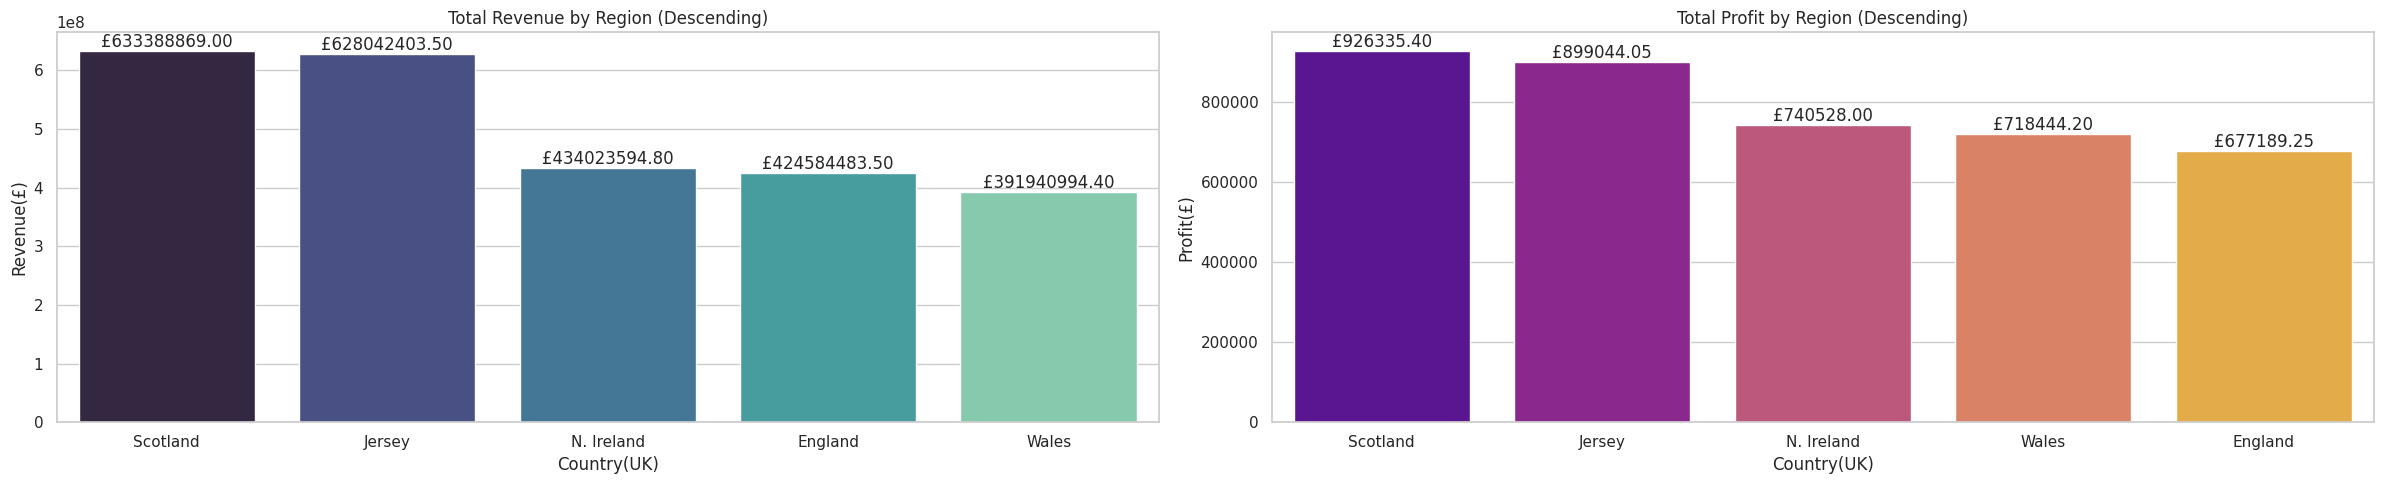

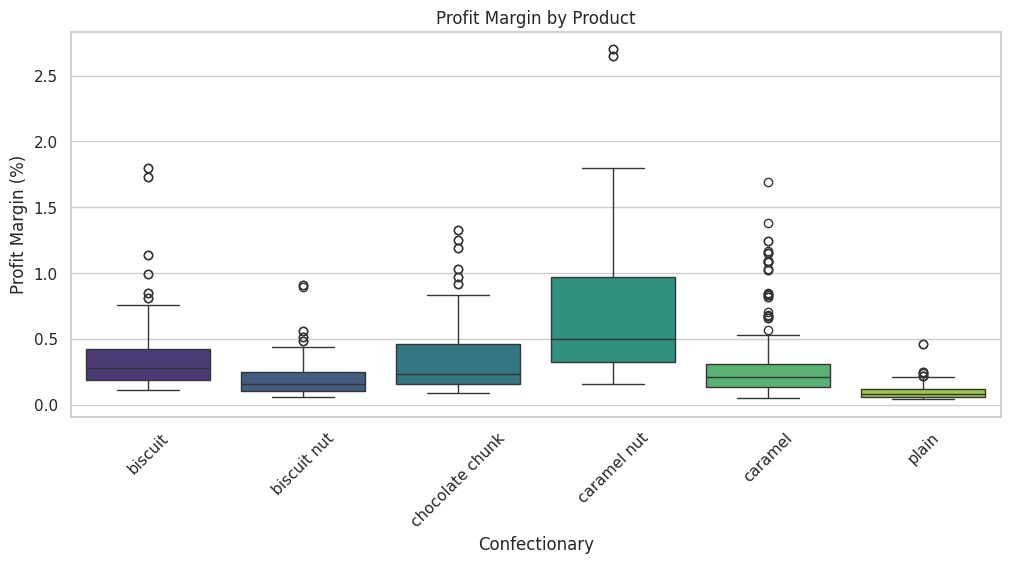

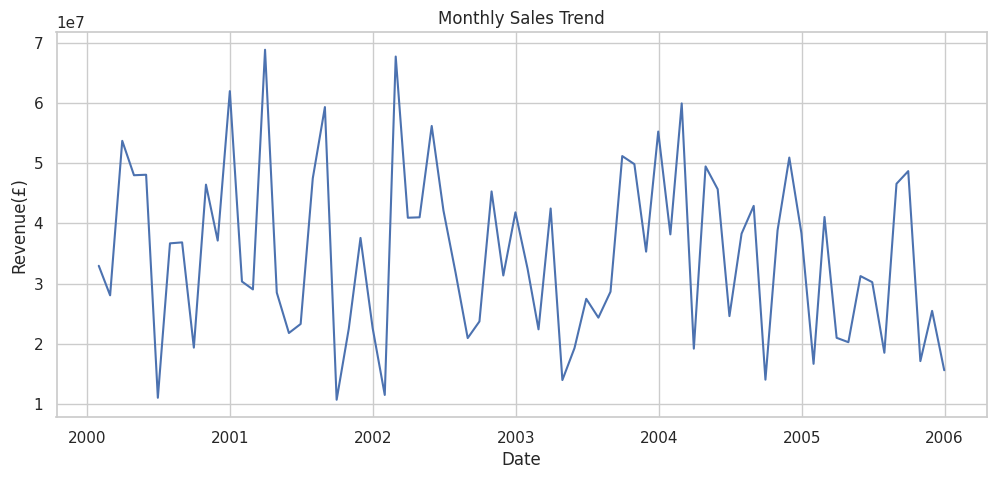

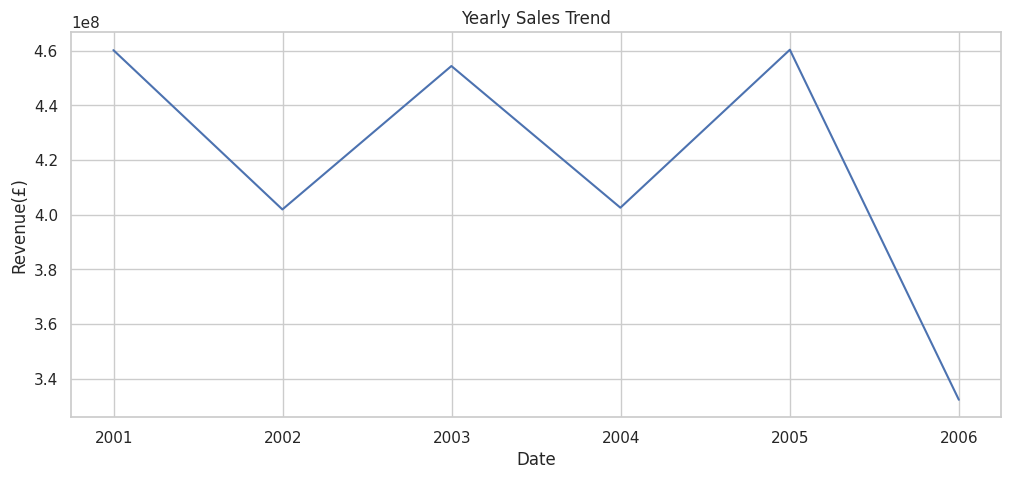

In [5]:
# STATIC Data Visualization

# 1. Regional comparison - Revenue and Profit (Side-by-side)
# Group and sort in descending order for easy to read
df_revenue_by_region = df.groupby("Country(UK)")["Revenue(£)"].sum().sort_values(ascending=False).reset_index()
df_profit_by_region = df.groupby("Country(UK)")["Profit(£)"].sum().sort_values(ascending=False).reset_index()


fig, axes = plt.subplots(1, 2, figsize=(24, 5))

revenue_plot = sns.barplot(data=df_revenue_by_region, x="Country(UK)", y="Revenue(£)", hue="Country(UK)", palette="mako", legend=False, ax=axes[0])
axes[0].set_title("Total Revenue by Region (Descending)")
axes[0].set_ylabel("Revenue(£)")
axes[0].set_xlabel("Country(UK)")
for container in revenue_plot.containers:
    axes[0].bar_label(container, fmt='£%.2f')

profit_plot = sns.barplot(data=df_profit_by_region, x="Country(UK)", y="Profit(£)", hue="Country(UK)", palette="plasma", legend=False, ax=axes[1])
axes[1].set_title("Total Profit by Region (Descending)")
axes[1].set_ylabel("Profit(£)")
axes[1].set_xlabel("Country(UK)")
for container in profit_plot.containers:
    axes[1].bar_label(container, fmt='£%.2f')

plt.tight_layout()
fig.savefig(os.path.join(OUT_DIR,"revenue_and_profit_by_region_sorted.png"), bbox_inches="tight")
plt.show()

# 2. Profit margin by product/confectionary
#df["Profit_Margin"] = df["Profit(£)"] / df["Revenue(£)"]

fig = plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="Confectionary", y="Profit Margin (%)", hue="Confectionary", palette="viridis", legend=False)
plt.title("Profit Margin by Product")
plt.xticks(rotation=45)
fig.savefig(os.path.join(OUT_DIR,"profit_margin_by_product.png"), bbox_inches="tight")
plt.show()

# 3.1 Time-Based Sales Trends
df["Date"] = pd.to_datetime(df["Date"])
df_month = df.groupby(pd.Grouper(key="Date", freq="ME"))["Revenue(£)"].sum().reset_index()

fig = plt.figure(figsize=(12,5))
sns.lineplot(data=df_month, x="Date", y="Revenue(£)")
plt.title("Monthly Sales Trend")
fig.savefig(os.path.join(OUT_DIR,"monthly_sales_trend.png"), bbox_inches="tight")
plt.show()

# 3.2 Time series
df["Date"] = pd.to_datetime(df["Date"])
df_year = df.groupby(pd.Grouper(key="Date", freq="YE"))["Revenue(£)"].sum().reset_index()

fig = plt.figure(figsize=(12,5))
sns.lineplot(data=df_year, x="Date", y="Revenue(£)")
plt.title("Yearly Sales Trend")
fig.savefig(os.path.join(OUT_DIR,"yearly_sales_trend.png"), bbox_inches="tight")
plt.show()

# Additional Visualization with Insights

/tmp/ipython-input-1156806734.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


Saved: average_profit_margin_by_product.png


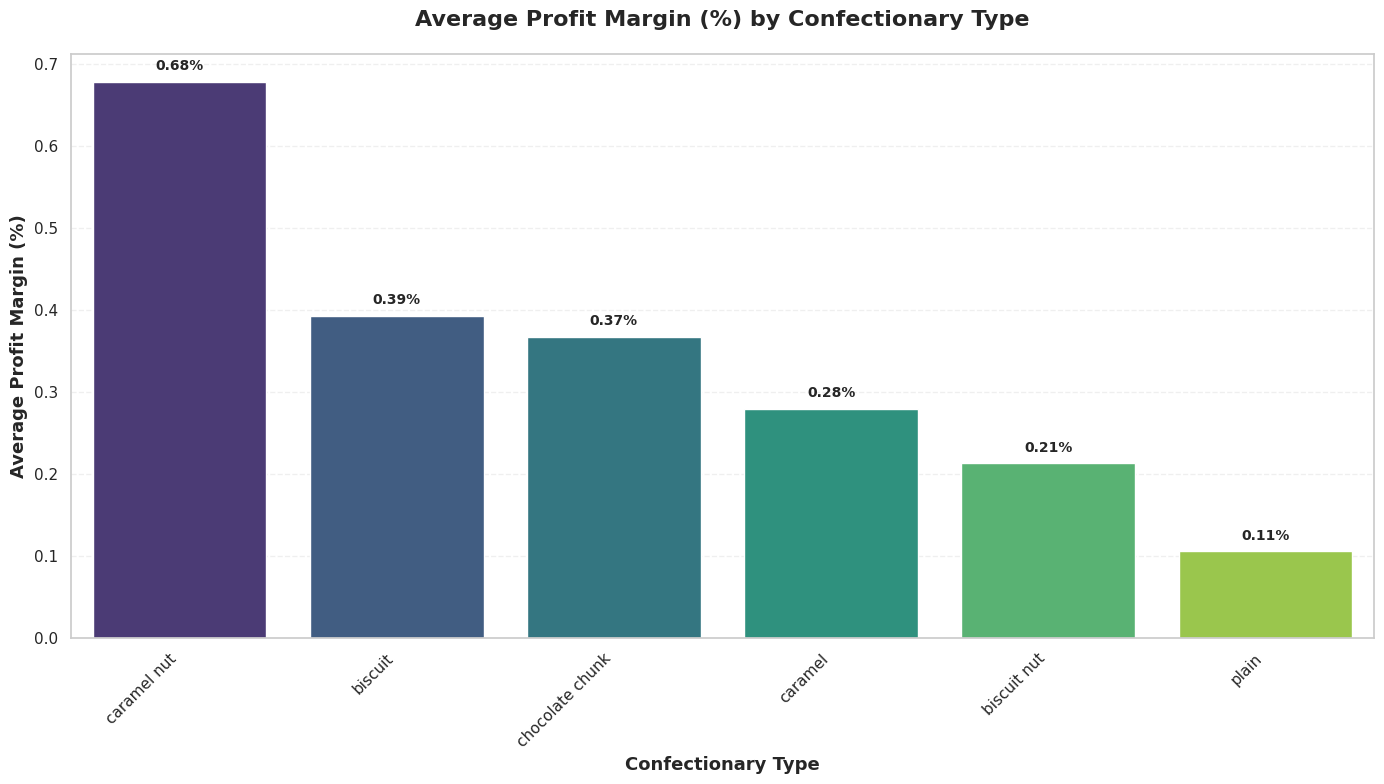


  Key Insights:
    - Highest margin: caramel nut (0.68%)
    - Lowest margin: plain (0.11%)
    - Margin range: 0.11% to 0.68%


In [6]:
# Calculate average profit margin by confectionary/product
profit_margin_by_confectionary = (
    df.groupby("Confectionary")["Profit Margin (%)"]
    .mean()
    .sort_values(ascending=False)
)

# Create figure
plt.figure(figsize=(14, 8))
bars = sns.barplot(
    x=profit_margin_by_confectionary.index,
    y=profit_margin_by_confectionary.values,
    palette="viridis"
)

# Add value labels on bars
for i, (confectionary, value) in enumerate(profit_margin_by_confectionary.items()):
    plt.text(i, value + 0.01, f'{value:.2f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Average Profit Margin (%) by Confectionary Type",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Confectionary Type", fontsize=13, fontweight='bold')
plt.ylabel("Average Profit Margin (%)", fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Save figure
fig.savefig(os.path.join(OUT_DIR,"average_profit_margin_by_product.png"), bbox_inches="tight")
print("Saved: average_profit_margin_by_product.png")
plt.show()


# Print insights
print("\n  Key Insights:")
print(f"    - Highest margin: {profit_margin_by_confectionary.index[0]} ({profit_margin_by_confectionary.values[0]:.2f}%)")
print(f"    - Lowest margin: {profit_margin_by_confectionary.index[-1]} ({profit_margin_by_confectionary.values[-1]:.2f}%)")
print(f"    - Margin range: {profit_margin_by_confectionary.values[-1]:.2f}% to {profit_margin_by_confectionary.values[0]:.2f}%")


[3] Creating Monthly Revenue Trends Visualisation...
Saved: monthly_revenue_trends.png


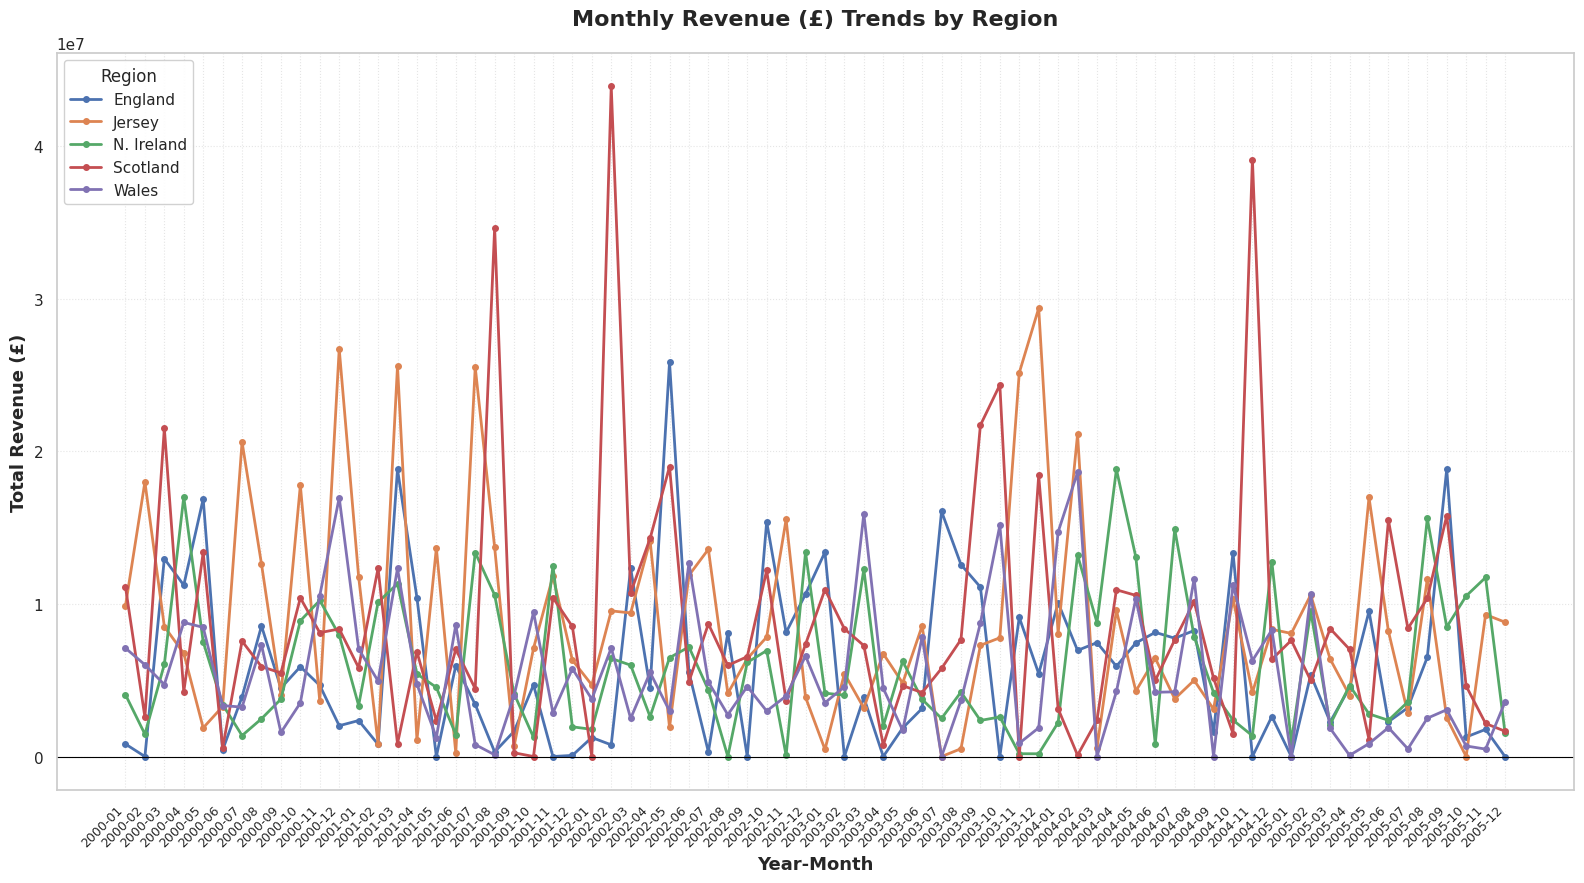


  Key Insights:
    - England: Peak revenue = £25,838,545 (2002-05)
    - Jersey: Peak revenue = £29,369,288 (2003-12)
    - N. Ireland: Peak revenue = £18,808,699 (2004-04)
    - Scotland: Peak revenue = £43,906,651 (2002-02)
    - Wales: Peak revenue = £18,610,619 (2004-02)

 ALL STATIC VISUALISATIONS GENERATED SUCCESSFULLY


In [7]:
#  Time-based sales trends - Monthly Trends

print("\n[3] Creating Monthly Revenue Trends Visualisation...")

# Aggregate sales by month and region
sales_over_time = (
    df.groupby(["YearMonth", "Country(UK)"])["Revenue(£)"]
    .sum()
    .unstack(fill_value=0)
)
sales_over_time.index = sales_over_time.index.astype(str)

# Create figure
plt.figure(figsize=(16, 9))
for region in sales_over_time.columns:
    plt.plot(sales_over_time.index, sales_over_time[region],
             marker='o', linewidth=2, markersize=4, label=region)

plt.title("Monthly Revenue (£) Trends by Region",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Year-Month", fontsize=13, fontweight='bold')
plt.ylabel("Total Revenue (£)", fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=11)
plt.legend(title="Region", fontsize=11, title_fontsize=12,
           loc='upper left', framealpha=0.9)
plt.grid(True, linestyle=":", alpha=0.5, linewidth=0.8)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()

# Save figure
fig.savefig(os.path.join(OUT_DIR,"monthly_revenue_trends.png"), bbox_inches="tight")
print("Saved: monthly_revenue_trends.png")
plt.show()

# Print insights
print("\n  Key Insights:")
for region in sales_over_time.columns:
    max_revenue = sales_over_time[region].max()
    max_month = sales_over_time[region].idxmax()
    print(f"    - {region}: Peak revenue = £{max_revenue:,.0f} ({max_month})")

print("\n" + "=" * 80)
print(" ALL STATIC VISUALISATIONS GENERATED SUCCESSFULLY")
print("=" * 80)


[3] Creating Annually Sales Trends Visualisation...
Saved: yearly_revenue_trends.png


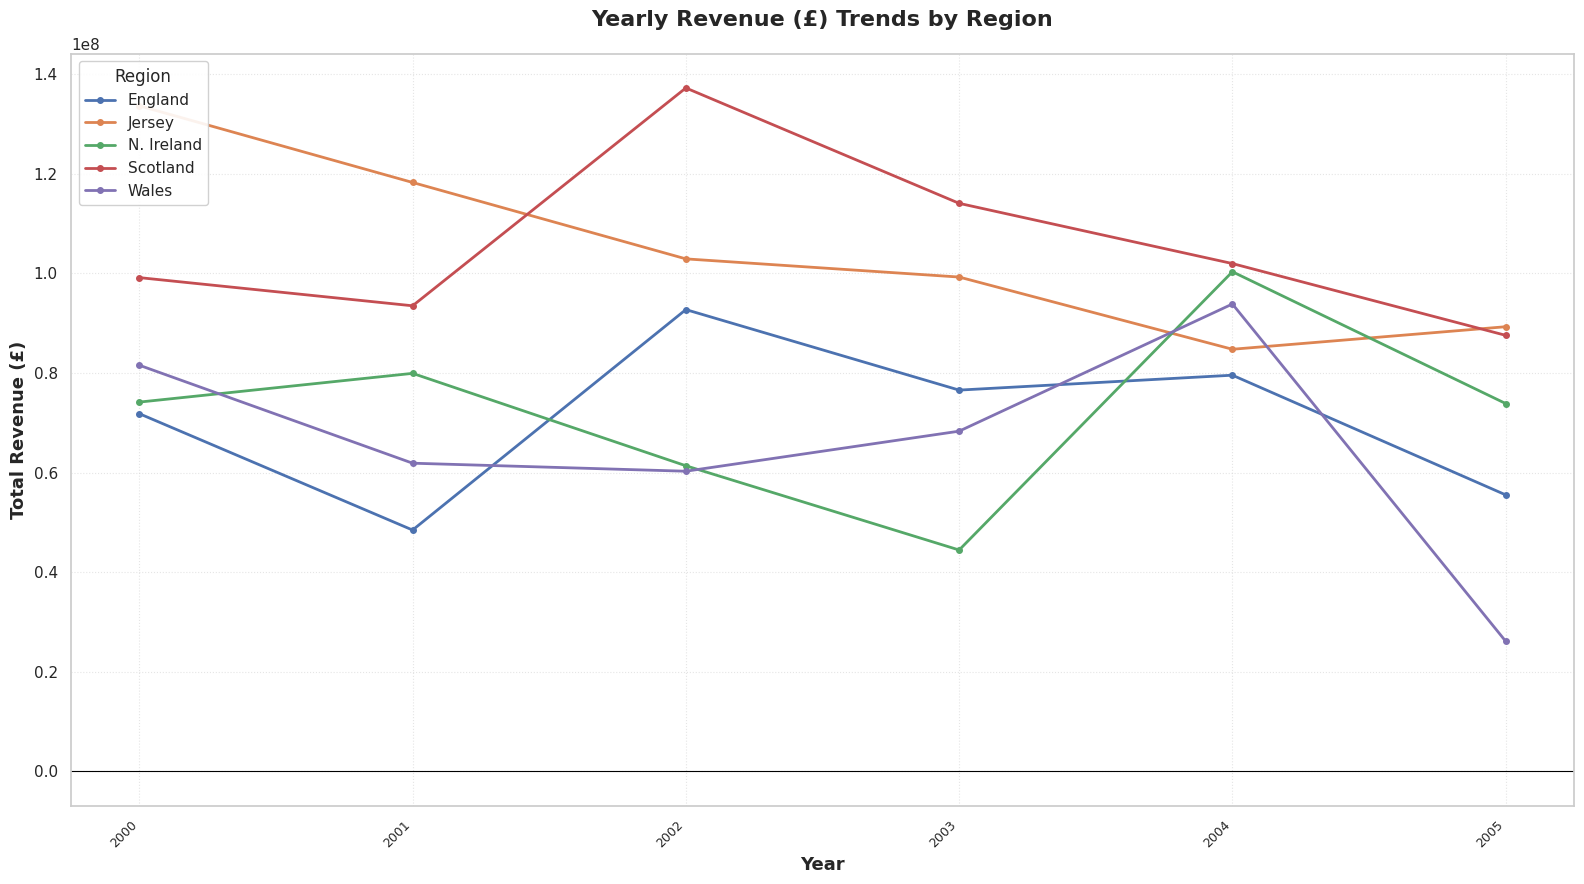


  Key Insights:
    - England: Peak revenue = £92,714,015 (2002)
    - Jersey: Peak revenue = £133,628,808 (2000)
    - N. Ireland: Peak revenue = £100,315,924 (2004)
    - Scotland: Peak revenue = £137,218,899 (2002)
    - Wales: Peak revenue = £93,838,428 (2004)

 ALL STATIC VISUALISATIONS GENERATED SUCCESSFULLY


In [8]:
#  Time-based sales trends - Annually Trends

print("\n[3] Creating Annually Sales Trends Visualisation...")

# Aggregate sales by year and region
sales_over_time = (
    df.groupby(["Year", "Country(UK)"])["Revenue(£)"]
    .sum()
    .unstack(fill_value=0)
)
sales_over_time.index = sales_over_time.index.astype(str)

# Create figure
plt.figure(figsize=(16, 9))
for region in sales_over_time.columns:
    plt.plot(sales_over_time.index, sales_over_time[region],
             marker='o', linewidth=2, markersize=4, label=region)

plt.title("Yearly Revenue (£) Trends by Region",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Year", fontsize=13, fontweight='bold')
plt.ylabel("Total Revenue (£)", fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=11)
plt.legend(title="Region", fontsize=11, title_fontsize=12,
           loc='upper left', framealpha=0.9)
plt.grid(True, linestyle=":", alpha=0.5, linewidth=0.8)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()

# Save figure
fig.savefig(os.path.join(OUT_DIR,"yearly_revenue_trends.png"), bbox_inches="tight")
print("Saved: yearly_revenue_trends.png")
plt.show()

# Print insights
print("\n  Key Insights:")
for region in sales_over_time.columns:
    max_revenue = sales_over_time[region].max()
    max_year = sales_over_time[region].idxmax()
    print(f"    - {region}: Peak revenue = £{max_revenue:,.0f} ({max_year})")

print("\n" + "=" * 80)
print(" ALL STATIC VISUALISATIONS GENERATED SUCCESSFULLY")
print("=" * 80)

# SECTION 4: INTERACTIVE DASHBOARDS (PLOTLY)

In [9]:
# SECTION 4: INTERACTIVE DASHBOARDS (PLOTLY)


print("SECTION 4: GENERATING INTERACTIVE DASHBOARDS")

# Interactive Dashboard 1: Profit Margin by Confectionary

print("\n[1] Creating Interactive Profit Margin Dashboard...")

profit_margin_data = (
    df.groupby("Confectionary")["Profit Margin (%)"]
    .mean()
    .reset_index()
    .sort_values(by="Profit Margin (%)", ascending=False)
)

fig1 = px.bar(
    profit_margin_data,
    x="Confectionary",
    y="Profit Margin (%)",
    title="<b>Interactive: Average Profit Margin (%) by Confectionary Type</b>",
    labels={"Profit Margin (%)": "Average Profit Margin (%)"},
    hover_data={
        "Confectionary": True,
        "Profit Margin (%)": ":.3f"
    },
    color="Profit Margin (%)",
    color_continuous_scale=px.colors.sequential.Viridis,
    text="Profit Margin (%)"
)

fig1.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='outside'
)

fig1.update_layout(
    xaxis_title="<b>Confectionary Type</b>",
    yaxis_title="<b>Average Profit Margin (%)</b>",
    font=dict(size=12),
    title_font_size=16,
    hovermode='x unified',
    height=600
)

# Save as HTML
html_filename_1 = "interactive_profit_margin_by_confectionary.html"
fig1.write_html(os.path.join(OUT_DIR, html_filename_1))
print(f"Saved: {html_filename_1}")


# Interactive Dashboard 2: Regional Performance

print("\n[2] Creating Interactive Regional Performance Dashboard...")

regional_performance_data = (
    df.groupby("Country(UK)")[["Profit(£)", "Revenue(£)"]]
    .sum()
    .reset_index()
    .sort_values(by="Profit(£)", ascending=False)
)

# Melt data for grouped bar chart
regional_melted = regional_performance_data.melt(
    id_vars="Country(UK)",
    value_vars=["Profit(£)", "Revenue(£)"],
    var_name="Metric",
    value_name="Amount (£)"
)

fig2 = px.bar(
    regional_melted,
    x="Country(UK)",
    y="Amount (£)",
    color="Metric",
    title="<b>Interactive: Total Profit and Revenue (£) by Region</b>",
    labels={"Country(UK)": "Region (Country in UK)"},
    barmode="group",
    hover_data={"Amount (£)": ":,.2f"},
    color_discrete_map={
        "Profit(£)": "#d62728",
        "Revenue(£)": "#1f77b4"
    },
    text="Amount (£)"
)

fig2.update_traces(
    texttemplate='£%{text:,.0f}',
    textposition='outside'
)

fig2.update_layout(
    xaxis_title="<b>Region (Country in UK)</b>",
    yaxis_title="<b>Amount (£)</b>",
    font=dict(size=12),
    title_font_size=16,
    hovermode='x unified',
    height=600,
    legend=dict(title="<b>Metric</b>", orientation="v", x=1.02, y=1)
)

# Save as HTML
html_filename_2 = "interactive_regional_performance.html"
fig2.write_html(os.path.join(OUT_DIR, html_filename_2))
print(f"Saved: {html_filename_2}")


# Interactive Dashboard 3: Monthly Revenue Trends


print("\n[3] Creating Interactive Monthly Revenue Trends Dashboard...")

# Prepare data
df["YearMonth_str"] = df["YearMonth"].astype(str)
sales_over_time_data = (
    df.groupby(["YearMonth_str", "Country(UK)"])["Revenue(£)"]
    .sum()
    .reset_index()
)

fig3 = px.line(
    sales_over_time_data,
    x="YearMonth_str",
    y="Revenue(£)",
    color="Country(UK)",
    title="<b>Interactive: Monthly Revenue (£) Trends by Region</b>",
    labels={
        "YearMonth_str": "Year-Month",
        "Revenue(£)": "Total Revenue (£)",
        "Country(UK)": "Region"
    },
    hover_data={
        "YearMonth_str": True,
        "Revenue(£)": ":,.2f",
        "Country(UK)": True
    },
    markers=True
)

fig3.update_layout(
    xaxis_title="<b>Year-Month</b>",
    yaxis_title="<b>Total Revenue (£)</b>",
    font=dict(size=12),
    title_font_size=16,
    hovermode='x unified',
    height=600,
    legend=dict(title="<b>Region</b>", orientation="v", x=1.02, y=1),
    xaxis=dict(tickangle=45)
)

# Add horizontal line at y=0
fig3.add_hline(y=0, line_dash="dash", line_color="red",
               annotation_text="Zero Revenue Line",
               annotation_position="bottom right")

# Save as HTML
html_filename_3 = "interactive_monthly_revenue_trends.html"
fig3.write_html(os.path.join(OUT_DIR, html_filename_3))
print(f"   Saved: {html_filename_3}")


print("\n" + "=" * 80)
print(" ALL INTERACTIVE DASHBOARDS GENERATED SUCCESSFULLY")
print("=" * 80)

SECTION 4: GENERATING INTERACTIVE DASHBOARDS

[1] Creating Interactive Profit Margin Dashboard...
Saved: interactive_profit_margin_by_confectionary.html

[2] Creating Interactive Regional Performance Dashboard...
Saved: interactive_regional_performance.html

[3] Creating Interactive Monthly Revenue Trends Dashboard...
   Saved: interactive_monthly_revenue_trends.html

 ALL INTERACTIVE DASHBOARDS GENERATED SUCCESSFULLY


In [10]:

!pip install jupyter-dash==0.4.2 dash==2.15.0

# SECTION 5: FULL DASHBOARD USING PLOTLY DASH

In [11]:
# ======================================================
#   COMPLETE ADVANCED DASH DASHBOARD (ERROR-FREE)
#   Jupyter / Google Colab Compatible
# ======================================================

!pip install jupyter_dash dash plotly

from jupyter_dash import JupyterDash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# ======================================================
# LOAD CLEANED DATA
# ======================================================
df = pd.read_csv("/content/outputs/cleaned_dataset.csv")
df["Date"] = pd.to_datetime(df["Date"])
df["ProfitMargin"] = df["Profit Margin (%)"]

# ======================================================
# KPI CARD STYLE (INLINE CSS DICTIONARY)
# ======================================================
kpi_style = {
    "backgroundColor": "#f7f9fc",
    "padding": "18px",
    "borderRadius": "12px",
    "boxShadow": "0px 2px 6px rgba(0,0,0,0.15)",
    "textAlign": "center"
}

kpi_h2_style = {
    "marginTop": "8px",
    "fontSize": "22px",
    "color": "#003366",
    "fontWeight": "bold"
}

kpi_h4_style = {
    "marginBottom": "5px",
    "color": "#555",
    "fontWeight": "600",
    "fontSize": "14px"
}

# ======================================================
# DASH APP LAYOUT
# ======================================================
app = JupyterDash(__name__)

app.layout = html.Div([

    # TITLE
    html.H1("Confectionery Sales Intelligence Dashboard",
            style={"textAlign": "center", "color": "#003366", "marginBottom": "20px"}),

    # FILTERS ROW
    html.Div([

        html.Div([
            html.Label("Region"),
            dcc.Dropdown(
                id="region_filter",
                options=[{"label": r, "value": r} for r in sorted(df["Country(UK)"].unique())] +
                        [{"label": "All Regions", "value": "ALL"}],
                value="ALL", clearable=False)
        ], style={"width": "24%", "display": "inline-block", "paddingRight": "10px"}),

        html.Div([
            html.Label("Confectionary"),
            dcc.Dropdown(
                id="product_filter",
                options=[{"label": p, "value": p} for p in sorted(df["Confectionary"].unique())] +
                        [{"label": "All Products", "value": "ALL"}],
                value="ALL", clearable=False)
        ], style={"width": "24%", "display": "inline-block", "paddingRight": "10px"}),

        html.Div([
            html.Label("Year"),
            dcc.Dropdown(
                id="year_filter",
                options=[{"label": str(y), "value": y} for y in sorted(df["Year"].unique())] +
                        [{"label": "All Years", "value": "ALL"}],
                value="ALL", clearable=False)
        ], style={"width": "24%", "display": "inline-block", "paddingRight": "10px"}),

        html.Div([
            html.Label("Month"),
            dcc.Dropdown(
                id="month_filter",
                options=[{"label": str(m), "value": m} for m in sorted(df["Month"].unique())] +
                        [{"label": "All Months", "value": "ALL"}],
                value="ALL", clearable=False)
        ], style={"width": "24%", "display": "inline-block"}),

    ], style={"marginBottom": "35px"}),

    # KPI CARDS (8 CARDS)
    html.Div([

        html.Div([
            html.H4("TOTAL REVENUE", style=kpi_h4_style),
            html.H2(id="rev_kpi", style=kpi_h2_style)
        ], style=kpi_style),

        html.Div([
            html.H4("TOTAL PROFIT", style=kpi_h4_style),
            html.H2(id="profit_kpi", style=kpi_h2_style)
        ], style=kpi_style),

        html.Div([
            html.H4("UNITS SOLD", style=kpi_h4_style),
            html.H2(id="units_kpi", style=kpi_h2_style)
        ], style=kpi_style),

        html.Div([
            html.H4("AVG PROFIT MARGIN (%)", style=kpi_h4_style),
            html.H2(id="avg_pm_kpi", style=kpi_h2_style)
        ], style=kpi_style),

        html.Div([
            html.H4("HIGHEST PROFIT MARGIN (%)", style=kpi_h4_style),
            html.H2(id="high_pm_kpi", style=kpi_h2_style)
        ], style=kpi_style),

        html.Div([
            html.H4("LOWEST PROFIT MARGIN (%)", style=kpi_h4_style),
            html.H2(id="low_pm_kpi", style=kpi_h2_style)
        ], style=kpi_style),

        html.Div([
            html.H4("BEST PRODUCT", style=kpi_h4_style),
            html.H2(id="best_prod_kpi", style=kpi_h2_style)
        ], style=kpi_style),

        html.Div([
            html.H4("WORST PRODUCT", style=kpi_h4_style),
            html.H2(id="worst_prod_kpi", style=kpi_h2_style)
        ], style=kpi_style),

    ], style={
        "display": "grid",
        "gridTemplateColumns": "repeat(4, 1fr)",
        "gap": "15px",
        "marginBottom": "40px"
    }),

    # ROW 1 VISUALS
    html.Div([
        dcc.Graph(id="rev_region", style={"width": "48%", "display": "inline-block"}),
        dcc.Graph(id="profit_region", style={"width": "48%", "display": "inline-block"})
    ]),

    # ROW 2 VISUALS
    html.Div([
        dcc.Graph(id="profit_margin_box", style={"width": "48%", "display": "inline-block"}),
        dcc.Graph(id="units_product", style={"width": "48%", "display": "inline-block"})
    ]),

    # ROW 3 - TREND
    html.Div([dcc.Graph(id="monthly_trend")])

])


# ======================================================
# CALLBACK FOR ALL FILTERS, KPIs & VISUALS
# ======================================================
@app.callback(

    [
        Output("rev_kpi", "children"),
        Output("profit_kpi", "children"),
        Output("units_kpi", "children"),
        Output("avg_pm_kpi", "children"),
        Output("high_pm_kpi", "children"),
        Output("low_pm_kpi", "children"),
        Output("best_prod_kpi", "children"),
        Output("worst_prod_kpi", "children"),
        Output("rev_region", "figure"),
        Output("profit_region", "figure"),
        Output("profit_margin_box", "figure"),
        Output("units_product", "figure"),
        Output("monthly_trend", "figure")
    ],

    [
        Input("region_filter", "value"),
        Input("product_filter", "value"),
        Input("year_filter", "value"),
        Input("month_filter", "value")
    ]
)
def update_dashboard(region, product, year, month):

    dff = df.copy()

    # APPLY FILTERS
    if region != "ALL":
        dff = dff[dff["Country(UK)"] == region]
    if product != "ALL":
        dff = dff[dff["Confectionary"] == product]
    if year != "ALL":
        dff = dff[dff["Year"] == year]
    if month != "ALL":
        dff = dff[dff["Month"] == month]

    # KPIs
    total_rev = f"£{dff['Revenue(£)'].sum():,.0f}"
    total_profit = f"£{dff['Profit(£)'].sum():,.0f}"
    total_units = f"{dff['Units Sold'].sum():,.0f}"

    avg_pm = f"{dff['Profit Margin (%)'].mean():.2f}%"
    high_pm = f"{dff['Profit Margin (%)'].max():.2f}%"
    low_pm = f"{dff['Profit Margin (%)'].min():.2f}%"

    prod_pm = dff.groupby("Confectionary")["Profit Margin (%)"].mean().sort_values()
    best_prod = f"{prod_pm.idxmax()} ({prod_pm.max():.2f}%)"
    worst_prod = f"{prod_pm.idxmin()} ({prod_pm.min():.2f}%)"

    # VISUALS
    fig_rev = px.bar(
        dff.groupby("Country(UK)")["Revenue(£)"].sum().reset_index(),
        x="Country(UK)", y="Revenue(£)", color="Country(UK)",
        title="Revenue by Region"
    )

    fig_profit = px.bar(
        dff.groupby("Country(UK)")["Profit(£)"].sum().reset_index(),
        x="Country(UK)", y="Profit(£)", color="Country(UK)",
        title="Profit by Region"
    )

    fig_margin = px.box(
        dff, x="Confectionary", y="Profit Margin (%)",
        title="Profit Margin Distribution (%)", color="Confectionary"
    )

    fig_units = px.bar(
        dff.groupby("Confectionary")["Units Sold"].sum().reset_index(),
        x="Confectionary", y="Units Sold",
        title="Units Sold by Product", color="Confectionary"
    )

    df_trend = dff.groupby("YearMonth")["Revenue(£)"].sum().reset_index()
    fig_trend = px.line(df_trend, x="YearMonth", y="Revenue(£)",
                        title="Monthly Revenue Trend")

    # RETURN ALL OUTPUTS
    return (
        total_rev, total_profit, total_units, avg_pm,
        high_pm, low_pm, best_prod, worst_prod,
        fig_rev, fig_profit, fig_margin, fig_units, fig_trend
    )


# ======================================================
# RUN APP INLINE
# ======================================================
app.run_server(mode="inline")


/usr/local/lib/python3.12/dist-packages/dash/dash.py:538: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>